In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz

In [3]:
# Load the dataset
df = pd.read_csv('Play Store Data.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Convert Rating to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Clean Size column
df['Size'] = df['Size'].replace('Varies with device', '0')
df['Size'] = df['Size'].str.replace('M', '', regex=True)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Convert Last Updated to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Clean Installs column
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean Reviews column
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            10524 non-null  float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.1+ MB


In [5]:
filtered_df = df[
    (df['Rating'] >= 4.0) &
    (df['Size'] >= 10) &
    (df['Last Updated'].dt.month == 1)
]


In [6]:
agg_df = filtered_df.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum'),
    total_installs=('Installs', 'sum')
).sort_values(by='total_installs', ascending=False).head(10)

agg_df

,avg_rating,total_reviews,total_installs
Category,,,
FAMILY,4.395455,4544623.0,182494820.0
SPORTS,4.342857,1982017.0,120511000.0
GAME,4.313333,2397589.0,115691000.0
ENTERTAINMENT,4.250000,1238948.0,51000000.0
PERSONALIZATION,4.475000,155996.0,15060000.0
PHOTOGRAPHY,4.150000,563720.0,10500000.0
LIFESTYLE,4.380000,42809.0,5071000.0
EDUCATION,4.400000,57645.0,2000000.0
SHOPPING,4.200000,19950.0,2000000.0


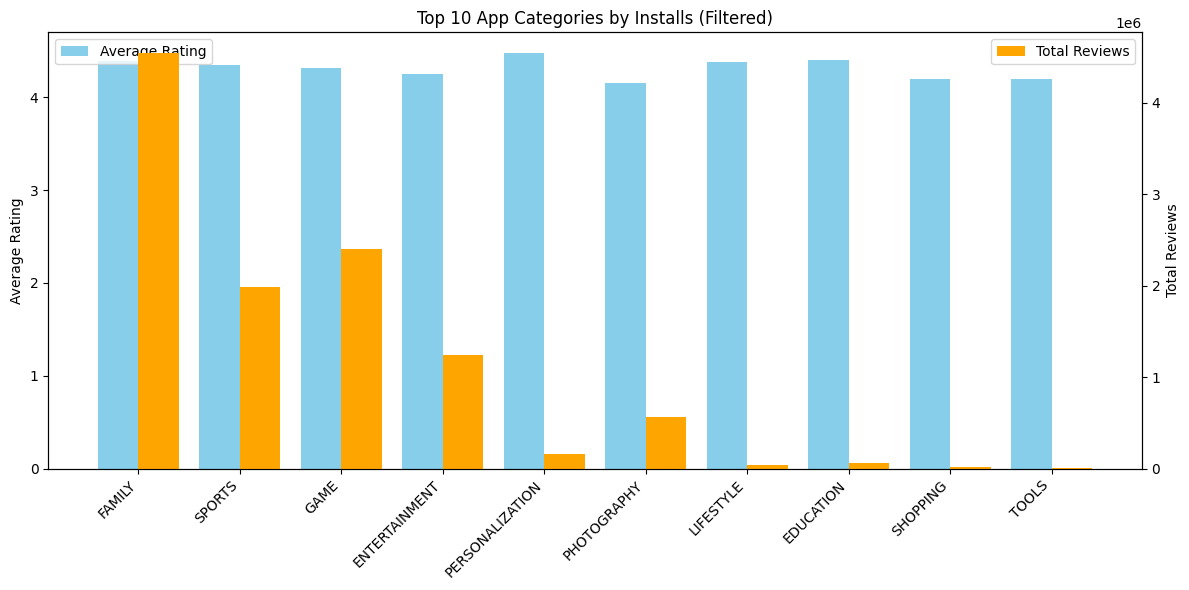

In [8]:
# Get current IST time
ist = pytz.timezone('Asia/Kolkata')
current_hour = datetime.now(ist).hour

if 15 <= current_hour < 17:
    categories = agg_df.index
    x = np.arange(len(categories))

    fig, ax1 = plt.subplots(figsize=(12,6))

    # Average Rating bars
    ax1.bar(x - 0.2, agg_df['avg_rating'], width=0.4, label='Average Rating', color='skyblue')

    # Total Reviews bars
    ax2 = ax1.twinx()
    ax2.bar(x + 0.2, agg_df['total_reviews'], width=0.4, label='Total Reviews', color='orange')

    # Labels
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=45, ha='right')
    ax1.set_ylabel('Average Rating')
    ax2.set_ylabel('Total Reviews')
    plt.title('Top 10 App Categories by Installs (Filtered)')

    # Legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
else:
    print("Chart not available outside 3 PM - 5 PM IST.")

In [7]:
# ⚠️ Testing only: force current_hour to a value in the range
current_hour = 16   # mock 4 PM IST

if 15 <= current_hour < 17:
    # (insert plotting code here)
    print("Showing chart...")
else:
    print("Chart not available outside 3 PM - 5 PM IST.")


Showing chart...
